In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from typing import Callable, Iterable, List
from morceaux import morceau

In [2]:
def group_by(data: List, size: int):
    for i in range(0, len(data), size):
        yield data[i:i+size]

In [ ]:
import itertools
from typing import Any, Optional


def competitor():
    # compute data mean
    # sort data
    # start with the largest, and add elements above or below mean depending on the current weight of batch
    pass

def morceau(
        records: Iterable[Any],
        batch_size: int,
        return_indices=False,
        size_calc_fn: Optional[Callable[[Any], int]] = None,
        chunk_size: Optional[int] = 2**10
) -> None:
    assert batch_size < chunk_size
    records = iter(records)
    chunk = list(itertools.islice(records, chunk_size))
    size_calc_fn = (lambda x: x) if size_calc_fn is None else size_calc_fn

    while len(chunk) > 0:
        weights = np.array([size_calc_fn(e) for e in chunk], dtype='uint')
        sorted_weights = np.argsort(weights)
        target = weights.mean()
        largest = len(weights) - 1
        batch = [chunk[sorted_weights[largest]]]
        while stuff:
            batch_mean = sum(batch) / len(batch)
            weights - target


## Behavior with some uniformely distributed data

In [3]:
values = np.random.randint(1, 100, 500_000)

batch_size = 16

batch_weights = np.array([sum(v) for v in group_by(values, batch_size)])
better_batch_weights = np.array([sum(v) for v in morceau(values, batch_size)])

print(f"Normal std : {batch_weights.std():.1f}  vs optimised std : {better_batch_weights.std():.1f}")

# with second part chosen with inverse proportion
# and also with second part chosen uniformely
# Normal std : 115  vs optimised std : ~15

Normal std : 114.3  vs optimised std : 15.0


<Axes: ylabel='Density'>

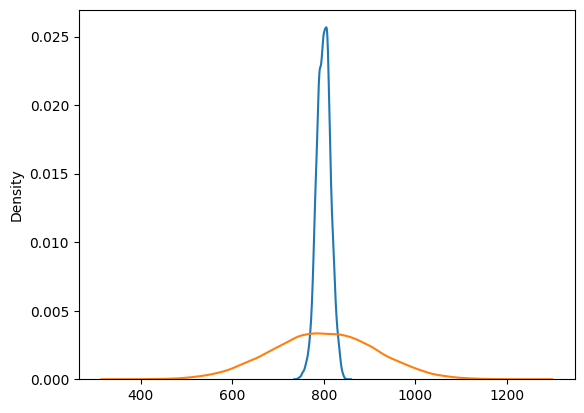

In [4]:
sns.kdeplot(better_batch_weights)
sns.kdeplot(batch_weights)

## Obviously way less useful with normally distributed data

In [5]:
values = np.random.normal(199, 30, 500_000)

batch_size = 16

batch_weights = np.array([sum(v) for v in group_by(values, batch_size)])
better_batch_weights = np.array([sum(v) for v in morceau(values, batch_size)])

print(f"Normal std : {batch_weights.std():.1f}  vs optimised std : {better_batch_weights.std():.1f}")

# with second part chosen with inverse proportion
# and also with second part chosen uniformely
# Normal std : 120  vs optimised std : ~16


Normal std : 120.2  vs optimised std : 15.2


<Axes: ylabel='Density'>

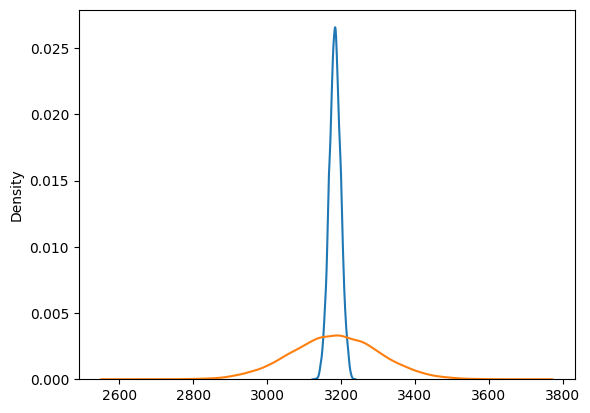

In [6]:
sns.kdeplot(better_batch_weights)
sns.kdeplot(batch_weights)

## More interesting with some outliers

In [7]:
n = 500_000
values = np.random.normal(199, 40, n)
outliers = np.random.rand(n) < 0.01
values[outliers] *= 100 * np.log(values[outliers])

batch_size = 16

batch_weights = np.array([sum(v) for v in group_by(values, batch_size)])
better_batch_weights = np.array([sum(v) for v in morceau(values, batch_size)])

print(f"Normal std : {batch_weights.std():_.1f}  vs optimised std : {better_batch_weights.std():_.1f}")


# Normal std : ~43_000.  vs optimised std : 35_602.73

# with second part chosen with inverse proportion
# Normal std : 43_228.5  vs optimised std : 39_646.0

# with second part chosen uniformely
# Normal std : 42_714.4  vs optimised std : 39_307.7


Normal std : 43_405.9  vs optimised std : 39_892.4


In [8]:
sns.kdeplot(better_batch_weights)
sns.kdeplot(batch_weights)

<Axes: ylabel='Density'>

## Variation with regard to batch size


If your batch size is large and you correctly shuffle your sample, law of large numbers stipulate your batches will be close in weight. But you are using this package because your are already short on ressources and at the limit of your batch size, so we will assume a bounded batch size of 64/128 for most of the testings.